In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# move to the target folder and listing the content
%cd /content/drive/MyDrive/Machine_Learning/
!ls

/content/drive/MyDrive/Machine_Learning
1_image_facial_recognition_basic.ipynb	  image_facial_emotion_recognition_MTCNN.ipynb	Models
2_live_webcam_facial_landmarks_CNN.ipynb  Images


In [15]:
!pip install mtcnn-opencv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00


In [16]:
# importing the modules
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
from mtcnn_cv2 import MTCNN
import cv2
import dlib

In [ ]:
# function to predic faces using the MTCCN model
def predict_mtcnn(filename):
  # load the image
  image = cv2.imread(filename)

  # define the detector
  detector = MTCNN()

  # detect faces in the image
  faces = detector.detect_faces(image)

  for result in faces:
    # get coordinates from face
    x, y, w, h = result['box']

    # create the face bounding box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  print("Using MTCNN detector:")
  # show the image
  cv2_imshow(image)


In [ ]:
# function to predic faces using the HAAR Cacade
def predict_haar(filename):
  # load the image
  image = cv2.imread(filename)

  # convert image from RGB to Grayscale
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # define the detector
  detector = cv2.CascadeClassifier('./Models/haarcascade_frontalface_default.xml')

  # detect faces in the image
  faces = detector.detectMultiScale(image_gray,scaleFactor=1.3, minNeighbors=10)
  #print("No of faces : ",len(faces))

  for (x, y, w, h) in faces:
    # create the face bounding box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  print("Using HAAR detector:")
  # show the image
  cv2_imshow(image)

In [ ]:
# function to predic faces using HOG
def predict_hog(filename):
  # load the image
  image = cv2.imread(filename)

  # convert image from RGB to Grayscale
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # define the detector
  detector = dlib.get_frontal_face_detector()

  # detect faces in the image
  faces = detector(image_gray, 1)

  for (i, rect) in enumerate(faces):
    # get coordinates from face
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # create the face bounding box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  print("Using HOG detector:")
  # show the image
  cv2_imshow(image)

Using MTCNN detector:


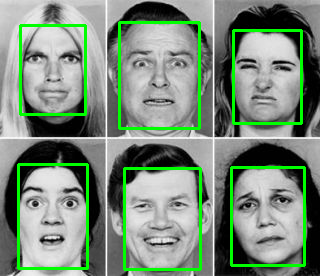

Using HAAR detector:


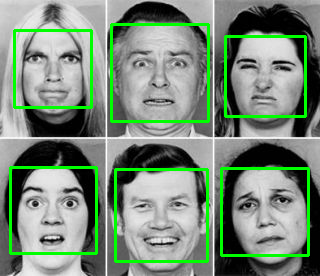

Using HOG detector:


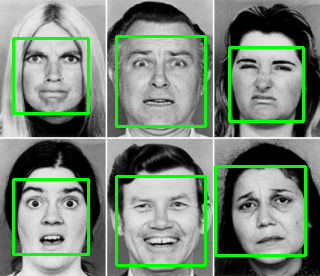

In [17]:
# image file path
image_file = './Images/emotion_faces.jpg'

# display faces recognition on the original image
predict_mtcnn(image_file)
predict_haar(image_file)
predict_hog(image_file)

Using MTCNN detector:


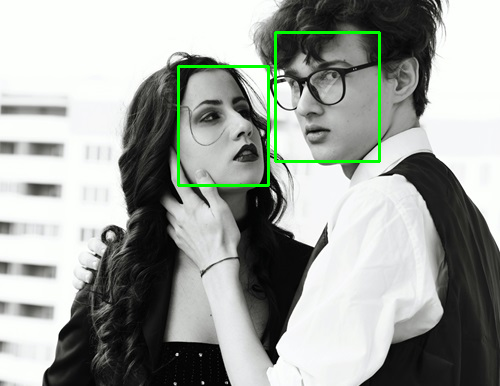

Using HAAR detector:


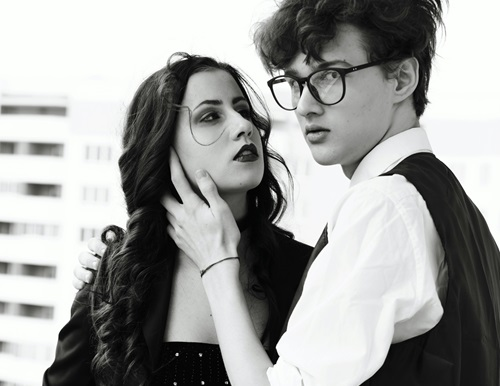

Using HOG detector:


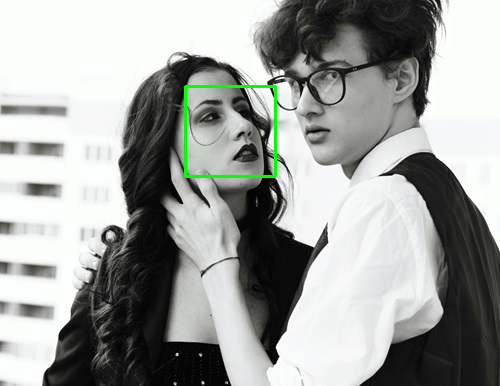

In [18]:
# image file path
image_file = './Images/faces1.jpg'

# display faces recognition on the original image
predict_mtcnn(image_file)
predict_haar(image_file)
predict_hog(image_file)

In [ ]:
# Google funcion to capture a photo from the webcam
def take_photo(filename='Images/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 171ms/step
Using MTCNN detector:


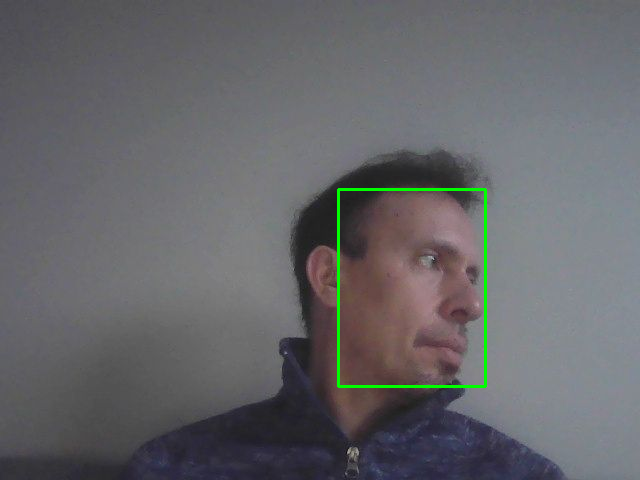

Using HAAR detector:


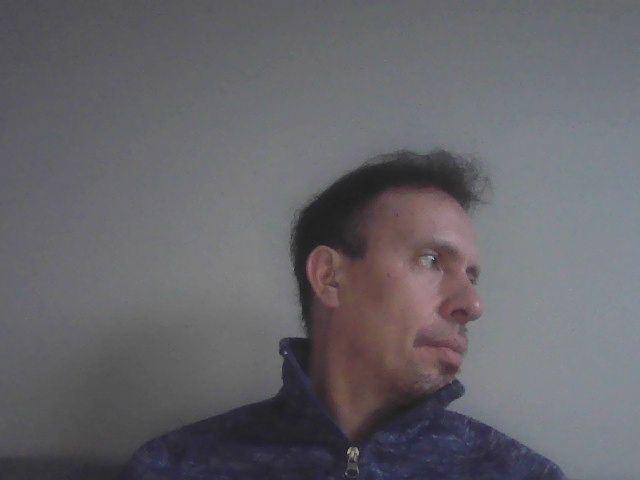

Using HOG detector:


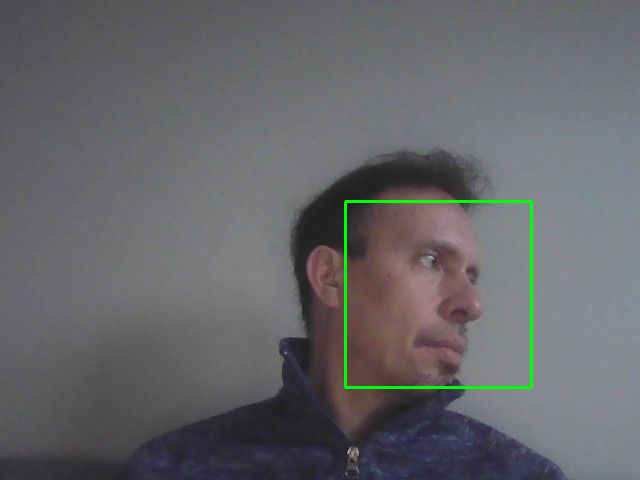

In [ ]:
# Capture the photo
image_photo = take_photo()

# display faces recognition from the photo
predict_mtcnn(image_photo)
predict_haar(image_photo)
predict_hog(image_photo)